In [2]:
import pandas as pd

### dataframe

#### Merge

In [8]:
# Create two sample DataFrames
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Value': [10, 20, 30]
})

df2 = pd.DataFrame({
    'ID': [1, 2, 4],
    'Name': ['Alice', 'Robert', 'David'],
    'Score': [85, 90, 75]
})

# Merge the DataFrames on 'ID'
# Pandas will add _x and _y to 'Name' as it's common but not a merge key
merged_df = pd.merge(df1, df2, on='ID', how='outer')

# Identify and remove duplicate columns (e.g., keep 'Name_x' and drop 'Name_y')
# You can choose which version to keep based on your data's context
merged_df = merged_df.drop(columns=['Name_y'])

# Optionally, rename the kept column if desired
merged_df = merged_df.rename(columns={'Name_x': 'Name'})

print(merged_df)

   ID     Name  Value  Score
0   1    Alice   10.0   85.0
1   2      Bob   20.0   90.0
2   3  Charlie   30.0    NaN
3   4      NaN    NaN   75.0


##### GroupBy And Reset_Index

In [7]:
# Example dataset
data = {
    "Product": ["Laptop", "Laptop", "Mobile"],
    "Region": ["North", "North", "South"],
    "Sales": [1000, 1500, 2000],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Group by 'Product' and 'Region' and calculate the sum of 'Sales'
result = df.groupby(["Product", "Region"])["Sales"].sum().reset_index()

# Display the result
print(result)

  Product Region  Sales
0  Laptop  North   2500
1  Mobile  South   2000


In [ ]:
mydataset = {
    'cars': ["BMW","Volvo","Ford"],
    'passings': [3, 7, 2]
}
myvar = pd.DataFrame(mydataset)
print(myvar)

In [3]:
df = pd.DataFrame({
    'group': ['A', 'A', 'B', 'B'],
    'value1': [10, 20, 30, 40],
    'value2': [100, 200, 300, 400]
})

# Group and aggregate with named aggregations
result = df.groupby('group').agg(
    sum_value1=('value1', 'sum'),
    mean_value2=('value2', 'mean')
)
print(result)

       sum_value1  mean_value2
group                         
A              30        150.0
B              70        350.0


In [4]:
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 20, 15, 25, 12]
})

# Add a new column 'Mean_by_Category' containing the mean 'Value' for each 'Category'
df['Mean_by_Category'] = df.groupby('Category')['Value'].transform('mean')

print(df)

  Category  Value  Mean_by_Category
0        A     10         12.333333
1        B     20         22.500000
2        A     15         12.333333
3        B     25         22.500000
4        A     12         12.333333


In [5]:
data = {'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
        'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
        'Value': [10, 20, 15, 25, 30, 35]}
df = pd.DataFrame(data)

# Group by 'Category' and 'Subcategory' and calculate the mean of 'Value' for each group
# Then, use transform to broadcast this mean back to the original DataFrame
df['Group_Mean_Value'] = df.groupby(['Category', 'Subcategory'])['Value'].transform('mean')

print(df)

  Category Subcategory  Value  Group_Mean_Value
0        A           X     10              20.0
1        A           Y     20              20.0
2        B           X     15              15.0
3        B           Y     25              30.0
4        A           X     30              20.0
5        B           Y     35              30.0


In [6]:

# Sample DataFrame
data = {'Category': ['A', 'A', 'B', 'B', 'A', 'B'],
        'Subcategory': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
        'Value': [10, 20, 15, 25, 30, 35]}
df = pd.DataFrame(data)

# Group by 'Category' and 'Subcategory' and calculate the mean of 'Value'
aggregated_df = df.groupby(['Category', 'Subcategory'])['Value'].mean().reset_index()
aggregated_df.rename(columns={'Value': 'Group_Mean_Value'}, inplace=True)

# Merge the aggregated results back into the original DataFrame
df = pd.merge(df, aggregated_df, on=['Category', 'Subcategory'], how='left')

print(df)

  Category Subcategory  Value  Group_Mean_Value
0        A           X     10              20.0
1        A           Y     20              20.0
2        B           X     15              15.0
3        B           Y     25              30.0
4        A           X     30              20.0
5        B           Y     35              30.0


### Series
**a pandas series is a one-dimensional array holding data of any type**

In [ ]:
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)

**with the _index_ argument, you can name your own labels**

In [ ]:
myvar = pd.Series(a, index=["x","y","z"])
print(myvar)

**a key/value object, like a dictionary**

In [ ]:
calories = {"day1":420, "day2": 380, "day3": 390}
myvar = pd.Series(calories)
print(myvar)

**create a series using only data from "day1" and "day2"**

In [11]:
calories = {"day1":420, "day2": 380, "day3": 390}
myvar = pd.Series(calories, index=["day1","day2"])
print(myvar)

day1    420
day2    380
dtype: int64


**Data sets in pandas are usually multi-dimensional tables, called DataFrames**

**Series is like a column, a DataFrame is the whole table**

In [ ]:
data = {
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
}
df = pd.DataFrame(data)
print(df)

**the DataFrame is like a table with rows and columns**

**the _loc_ attribute to return one or more specified row(s)**

**this example returns a Panda Series**

In [ ]:
print(df.loc[0])

**this example returns a Panda DataFrame**

In [ ]:
print(df.loc[[0,1]])

In [ ]:
data = {
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
}
df = pd.DataFrame(data, index=["day1","day2","day3"])
print(df)

In [ ]:
print(df.loc["day2"])

In [ ]:
df = pd.read_csv("data/uber0.csv")
print(df)

**If you have a large DataFrame with many rows, Panda will only return the first 5 rows and the last 5 rows**

In [ ]:
print(pd.options.display.max_rows)
df = pd.read_csv("data/uber-raw-data-sep14.csv")
print(df)

**you can load JSON code into a DataFrame directly**

In [ ]:
data = {
  "Duration":{
    "0":60,
    "1":60,
  },
  "Pulse":{
    "0":110,
    "1":117,
  },
  "Maxpulse":{
    "0":130,
    "1":145,
  },
  "Calories":{
    "0":409,
    "1":479,
  }
}

df = pd.DataFrame(data)

print(df) 


**the _head_() method returns a specified number of rows, starting from the top**

In [ ]:
df = pd.read_csv('data/uber1.csv')
print(df.head(3))

**the tail() method returns a specified number of rows starting from the bottom**

In [ ]:
print(df.tail(3))

**a method called info() that gives you more information about the dataset**

In [ ]:
print(df.info()) 

### Ploting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

   Duration  Pulse  Maxpulse  Calories
0        60    110       130     409.1
1        60    117       145     479.0
2        60    103       135     340.0


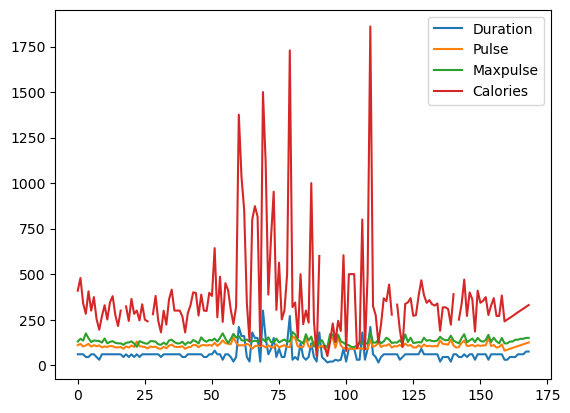

In [4]:
df = pd.read_csv('data/data.csv')
print(df.head(3))
df.plot()
plt.show()

In [ ]:
df = pd.read_csv('data/data.csv')
df.plot(kind='scatter',x='Duration',y='Calories')
plt.show()

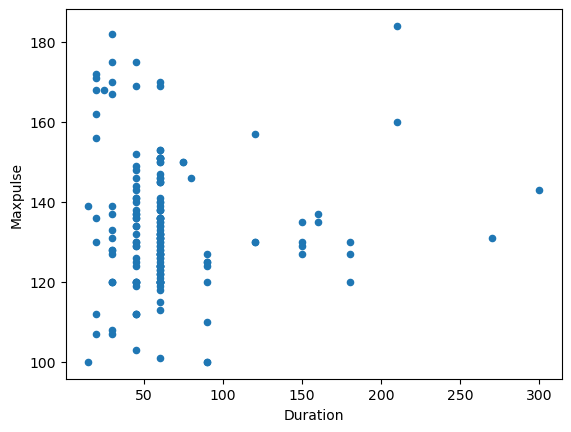

In [6]:
df = pd.read_csv('data/data.csv')
df.plot(kind='scatter',x='Duration',y='Maxpulse')
plt.show()

<Axes: ylabel='Frequency'>

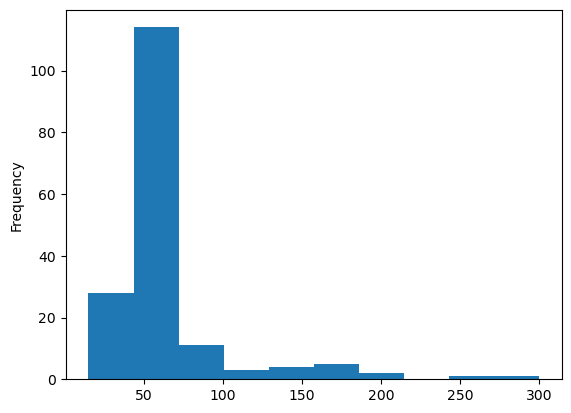

In [7]:
df["Duration"].plot(kind='hist')

### Correlations

**the _corr_() method calculates the relationship between each column in your data set**

In [8]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


### Cleaning data

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
None


**the _dropna_() method returns a new DataFrame, and will not change the original**

In [ ]:
df = pd.read_csv('data/data.csv')
new_df = df.dropna()
print(new_df)

**the _dropna(inplace=True)_ will not return a new DataFrame, but it will remove all rows containing NULL values from the original DataFrame**

In [3]:
df = pd.read_csv('data/data.csv')
df.dropna(inplace = True)
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[164 rows x 4 columns]


**another way of dealing with empty cells is to insert a new value instead**

In [ ]:
df = pd.read_csv('data/data.csv')
df.fillna(130, inplace=True)

**To only replace empty values for one column, specify the column name for the DataFrame**

In [ ]:
df = pd.read_csv('data/data.csv')
df.fillna({"Calories":130}, inplace=True)
print(df)

**replace using mean, median, or mode**

In [ ]:
df = pd.read_csv('data/data.csv')
x = df["Calories"].mean()
df.fillna({"Calories": x}, inplace=True)

**cells with data of wrong format can make it difficult, or even immpossible, to analyze data**

**To fix it, you have two options: remove the rows, or convert all cells in the columns into the same format**

In [ ]:
df = pd.read_csv('data/data.csv')
print(df)

**set "Duration" = 45 in row 7**

In [6]:
df.loc[7, 'Duration'] = 45

**if the value is higher than 120, set it to 120**

In [7]:
for x in df.index:
    if df.loc[x, "Duration"] > 120:
        df.loc[x, "Duration"] = 120

**remove the rows that contains wrong data**

In [9]:
for x in df.index:
    if df.loc[x, "Duration"] > 120:
        df.drop(x, inplace=True)

**remove duplicates**

In [10]:
df.drop_duplicates(inplace=True)